## Vestari

[1] "C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/Ergebnisse_time/Plot_TimeOfDay_Vestari_Jokulsa.png"

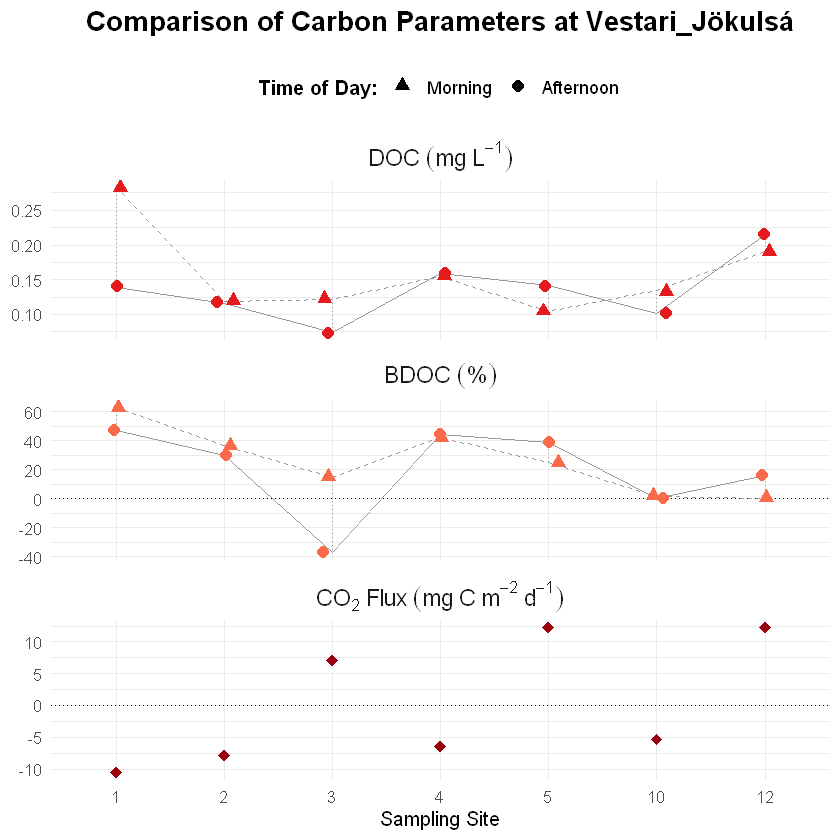

In [7]:
# Pakete
library(readxl)
library(dplyr)
library(ggplot2)
library(tidyr)

# Daten einlesen
df <- read_excel("C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/Sophia_Data.xls",
                 sheet = "FINAL_final_final")

# Vestari-Daten
vestari <- df %>%
  filter(river_name == "Vestari_Joekulsa") %>%
  mutate(label_type = ifelse(grepl("VM", DOC_label), "Morning", "Afternoon"))

# DOC + BDOC_pct
carbon_data <- vestari %>%
  select(site_nr, average_DOC_sample, BDOC_pct, label_type) %>%
  pivot_longer(cols = c(average_DOC_sample, BDOC_pct),
               names_to = "Variable", values_to = "Wert") %>%
  mutate(Variable = recode(Variable,
                           "average_DOC_sample" = "DOC (mg~L^{-1})",
                           "BDOC_pct" = "BDOC (%)"),
         site_nr = factor(site_nr))

# Flux Daten
flux_data <- vestari %>%
  distinct(site_nr, CO2_Flux) %>%
  mutate(Variable = "CO₂ Flux", Wert = CO2_Flux,
         site_nr = factor(site_nr),
         label_type = NA)

# Levels fix
var_levels <- c("DOC (mg~L^{-1})", "BDOC (%)", "CO₂ Flux")
carbon_data$Variable <- factor(carbon_data$Variable, levels = var_levels)
flux_data$Variable <- factor(flux_data$Variable, levels = var_levels)

# Kombinieren
combined_data <- bind_rows(
  carbon_data %>% select(site_nr, Variable, Wert, label_type),
  flux_data %>% select(site_nr, Variable, Wert, label_type)
)

# Reihenfolge Shapes
combined_data$label_type <- factor(combined_data$label_type, levels = c("Morning", "Afternoon"))

# Vertikale Linien
linien <- carbon_data %>%
  select(site_nr, Variable, Wert, label_type) %>%
  pivot_wider(names_from = label_type, values_from = Wert) %>%
  filter(!is.na(Morning) & !is.na(Afternoon))

# Farben
farben <- c("DOC (mg~L^{-1})" = "#e41a1c",
            "BDOC (%)" = "#fb6a4a",
            "CO₂ Flux" = "#99000d")

# Labels
facet_labels <- c(
  "DOC (mg~L^{-1})" = "DOC~(mg~L^{-1})",
  "BDOC (%)" = "BDOC~('%')",
  "CO₂ Flux" = "CO[2]~Flux~(mg~C~m^{-2}~d^{-1})"
)

# Speicherpfad
save_path <- "C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/Ergebnisse_time/Plot_TimeOfDay_Vestari_Jokulsa.png"

# Plot
p <- ggplot(combined_data, aes(x = site_nr, y = Wert)) +
  ggtitle("Comparison of Carbon Parameters at Vestari_Jökulsá") +
  # Null-Linien: BDOC & CO₂ Flux (beide schwarz gepunktet)
  geom_hline(data = data.frame(Variable = factor("BDOC (%)", levels = var_levels)), 
             aes(yintercept = 0),
             color = "black", size = 0.4, linetype = "dotted") +
  geom_hline(data = data.frame(Variable = factor("CO₂ Flux", levels = var_levels)), 
             aes(yintercept = 0),
             color = "black", size = 0.4, linetype = "dotted") +
  # Vertikale Linien
  geom_segment(data = linien,
               aes(x = site_nr, xend = site_nr, y = Morning, yend = Afternoon),
               color = "grey60", size = 0.5, linetype = "dotted") +
  # Linien DOC & BDOC
  geom_line(data = carbon_data %>% filter(label_type == "Morning"),
            aes(x = as.numeric(site_nr), y = Wert, group = Variable),
            color = "grey60", linetype = "dashed", size = 0.5) +
  geom_line(data = carbon_data %>% filter(label_type == "Afternoon"),
            aes(x = as.numeric(site_nr), y = Wert, group = Variable),
            color = "grey60", linetype = "solid", size = 0.5) +
  # Punkte nur DOC & BDOC mit Shapes
  geom_point(data = combined_data %>% filter(Variable != "CO₂ Flux"),
             aes(shape = label_type, color = Variable),
             size = 3, position = position_jitter(width = 0.1), na.rm = TRUE) +
  # Punkte Flux ohne Shapes
  geom_point(data = combined_data %>% filter(Variable == "CO₂ Flux"),
             aes(color = Variable),
             shape = 18, size = 3, na.rm = TRUE) +
  scale_shape_manual(values = c("Morning" = 17, "Afternoon" = 16), na.translate = FALSE) +
  scale_color_manual(values = farben, guide = "none") +
  facet_wrap(vars(Variable), scales = "free_y", ncol = 1, drop = FALSE,
             labeller = as_labeller(facet_labels, label_parsed)) +
  labs(x = "Sampling Site", y = NULL, shape = "Time of Day:") +
  theme_minimal(base_size = 12) +
  theme(plot.title = element_text(size = 16, face = "bold", hjust = 0.5, margin = margin(b = 15)),
        strip.text = element_text(size = 14, face = "bold"),
        strip.background = element_blank(),
        axis.text.x = element_text(size = 10),
        legend.position = "top",
        legend.direction = "horizontal",
        legend.title = element_text(size = 12, face = "bold", hjust = 0),
        legend.text = element_text(size = 11),
        legend.spacing.x = unit(0.5, 'cm'),
        legend.justification = "center")

# Plot anzeigen
print(p)

# Plot speichern in Textbreite (DIN A4), aber kompakter in der Höhe
ggsave(filename = save_path, plot = p,
       width = 5.9, height = 6.5, units = "in", dpi = 300)

# Speicherpfad anzeigen
save_path


## Virkisa


Warning message:
"Removed 4 rows containing missing values or values outside the scale range (`geom_line()`)."
Warning message:
"Removed 2 rows containing missing values or values outside the scale range (`geom_line()`)."
Warning message:
"Removed 4 rows containing missing values or values outside the scale range (`geom_line()`)."
Warning message:
"Removed 2 rows containing missing values or values outside the scale range (`geom_line()`)."


[1] "C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/Ergebnisse_time/Plot_TimeOfDay_Virkisa.png"

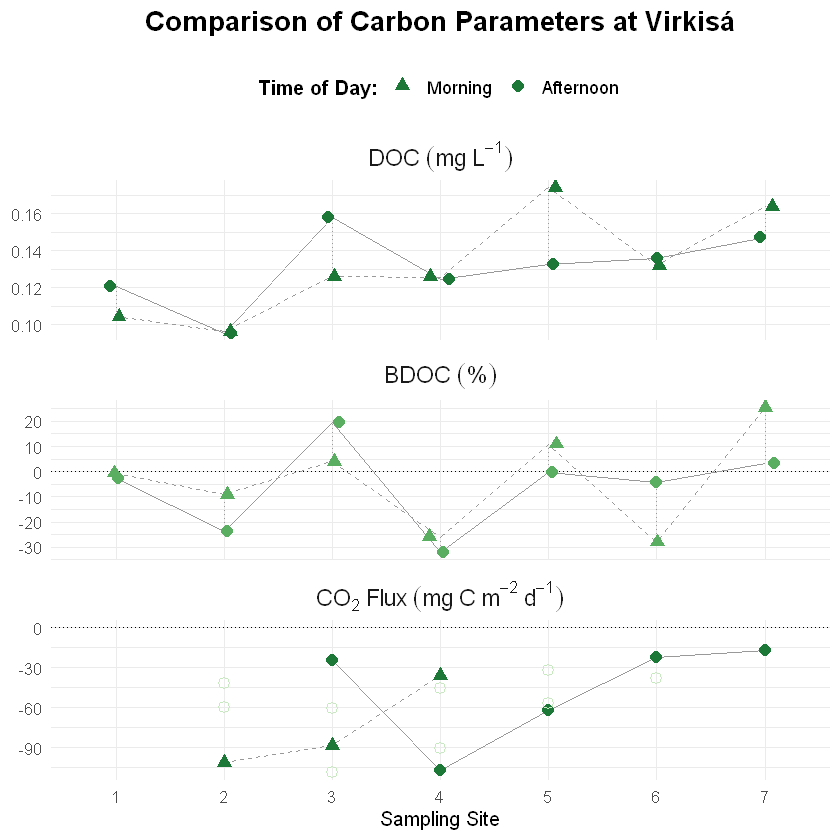

In [6]:
# Pakete
library(readxl)
library(dplyr)
library(ggplot2)
library(tidyr)

# Daten einlesen
df <- read_excel("C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/Sophia_Data.xls",
                 sheet = "FINAL_final_final")

# DOC & BDOC_pct nur group_nr == 1, Sites 1-7
virkisa_carbon <- df %>%
  filter(river_name == "Virkisa", group_nr == 1, site_nr <= 7) %>%
  mutate(label_type = ifelse(grepl("VM", DOC_label), "Morning", "Afternoon"))

# Flux alle groups, Sites 1-7
virkisa_flux <- df %>%
  filter(river_name == "Virkisa", site_nr <= 7) %>%
  mutate(label_type = ifelse(grepl("VM", DOC_label), "Morning", "Afternoon"),
         Flux_group = ifelse(group_nr == 1, "Group 1", "Other Groups")) %>%
  distinct(site_nr, CO2_Flux, group_nr, label_type, Flux_group) %>%
  mutate(Variable = "CO₂ Flux", Wert = CO2_Flux,
         site_nr = factor(site_nr))

# DOC + BDOC_pct ins Long Format
carbon_data <- virkisa_carbon %>%
  select(site_nr, average_DOC_sample, BDOC_pct, label_type) %>%
  pivot_longer(cols = c(average_DOC_sample, BDOC_pct),
               names_to = "Variable", values_to = "Wert") %>%
  mutate(Variable = recode(Variable,
                           "average_DOC_sample" = "DOC (mg~L^{-1})",
                           "BDOC_pct" = "BDOC (%)"),
         site_nr = factor(site_nr))

# Levels fix
var_levels <- c("DOC (mg~L^{-1})", "BDOC (%)", "CO₂ Flux")
carbon_data$Variable <- factor(carbon_data$Variable, levels = var_levels)
virkisa_flux$Variable <- factor(virkisa_flux$Variable, levels = var_levels)

# Kombinieren
combined_data <- bind_rows(
  carbon_data %>% select(site_nr, Variable, Wert, label_type),
  virkisa_flux %>% select(site_nr, Variable, Wert, label_type, Flux_group)
)

# Reihenfolge Shapes
combined_data$label_type <- factor(combined_data$label_type, levels = c("Morning", "Afternoon"))

# Vertikale Linien
linien <- carbon_data %>%
  select(site_nr, Variable, Wert, label_type) %>%
  pivot_wider(names_from = label_type, values_from = Wert) %>%
  filter(!is.na(Morning) & !is.na(Afternoon))

# Farben
farben <- c("DOC (mg~L^{-1})" = "#1b7837",
            "BDOC (%)" = "#5aae61",
            "CO₂ Flux" = "#a6dba0")

# Labels
facet_labels <- c(
  "DOC (mg~L^{-1})" = "DOC~(mg~L^{-1})",
  "BDOC (%)" = "BDOC~('%')",
  "CO₂ Flux" = "CO[2]~Flux~(mg~C~m^{-2}~d^{-1})"
)

# Speicherpfad
save_path <- "C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/Ergebnisse_time/Plot_TimeOfDay_Virkisa.png"

# Plot
p <- ggplot(combined_data, aes(x = site_nr, y = Wert)) +
  ggtitle("Comparison of Carbon Parameters at Virkisá") +
  # Null-Linien: BDOC (schwarz gepunktet) + CO₂ Flux (grau gestrichelt)
  geom_hline(data = data.frame(Variable = factor("BDOC (%)", levels = var_levels)), 
             aes(yintercept = 0),
             color = "black", size = 0.4, linetype = "dotted") +
  geom_hline(data = data.frame(Variable = factor("CO₂ Flux", levels = var_levels)), 
             aes(yintercept = 0),
             color = "black", size = 0.4, linetype = "dotted") +
  # Vertikale Linien
  geom_segment(data = linien,
               aes(x = site_nr, xend = site_nr, y = Morning, yend = Afternoon),
               color = "grey60", size = 0.5, linetype = "dotted") +
  # Linien DOC & BDOC
  geom_line(data = carbon_data %>% filter(label_type == "Morning"),
            aes(x = as.numeric(site_nr), y = Wert, group = Variable),
            color = "grey60", linetype = "dashed", size = 0.5) +
  geom_line(data = carbon_data %>% filter(label_type == "Afternoon"),
            aes(x = as.numeric(site_nr), y = Wert, group = Variable),
            color = "grey60", linetype = "solid", size = 0.5) +
  # Linien Flux (nur Group 1)
  geom_line(data = virkisa_flux %>% filter(Flux_group == "Group 1", label_type == "Morning"),
            aes(x = as.numeric(site_nr), y = Wert),
            color = "grey60", linetype = "dashed", size = 0.5) +
  geom_line(data = virkisa_flux %>% filter(Flux_group == "Group 1", label_type == "Afternoon"),
            aes(x = as.numeric(site_nr), y = Wert),
            color = "grey60", linetype = "solid", size = 0.5) +
  # Punkte DOC & BDOC
  geom_point(data = combined_data %>% filter(Variable != "CO₂ Flux"),
             aes(shape = label_type, color = Variable),
             size = 3, position = position_jitter(width = 0.1), na.rm = TRUE) +
  # Flux Punkte Group 1 mit Shape
  geom_point(data = combined_data %>% filter(Variable == "CO₂ Flux", Flux_group == "Group 1"),
             aes(shape = label_type),
             color = "#1b7837", size = 3, na.rm = TRUE) +
  # Flux Punkte andere Gruppen offen
  geom_point(data = combined_data %>% filter(Variable == "CO₂ Flux", Flux_group == "Other Groups"),
             shape = 1, color = "#c7e9c0", size = 3, na.rm = TRUE) +
  scale_shape_manual(values = c("Morning" = 17, "Afternoon" = 16), na.translate = FALSE) +
  scale_color_manual(values = farben, guide = "none") +
  facet_wrap(vars(Variable), scales = "free_y", ncol = 1, drop = FALSE,
             labeller = as_labeller(facet_labels, label_parsed)) +
  labs(x = "Sampling Site", y = NULL, shape = "Time of Day:") +
  theme_minimal(base_size = 12) +
  theme(plot.title = element_text(size = 16, face = "bold", hjust = 0.5, margin = margin(b = 15)),
        strip.text = element_text(size = 14, face = "bold"),
        strip.background = element_blank(),
        axis.text.x = element_text(size = 10),
        legend.position = "top",
        legend.direction = "horizontal",
        legend.title = element_text(size = 12, face = "bold", hjust = 0),
        legend.text = element_text(size = 11),
        legend.spacing.x = unit(0.5, 'cm'),
        legend.justification = "center")

# Plot anzeigen
print(p)

# Plot speichern
ggsave(filename = save_path, plot = p,
       width = 5.9, height = 6.5, units = "in", dpi = 300)

# Speicherpfad anzeigen
save_path


# signifikant  

laut AK aber ka 

In [3]:
colnames(df)


[1] "river_name"            "group_nr"              "DOC_label"            
 [4] "site_nr"               "sample_date"           "distance_from_glacier"
 [7] "DOC"                   "average_DOC_sample"    "BDOC_label"           
[10] "BDOC"                  "average_BDOC_sample"   "BDOC_after_14_days"   
[13] "BDOC_pct"              "CO2_Flux"              "Hight_sl"             
[16] "time"


NM VM 
16 45 


	Shapiro-Wilk normality test

data:  df$average_DOC_sample[df$time == "VM"]
W = 0.90086, p-value = 0.001008



	Shapiro-Wilk normality test

data:  df$average_DOC_sample[df$time == "NM"]
W = 0.96918, p-value = 0.8252



	Shapiro-Wilk normality test

data:  df$BDOC_pct[df$time == "VM"]
W = 0.9593, p-value = 0.1307



	Shapiro-Wilk normality test

data:  df$BDOC_pct[df$time == "NM"]
W = 0.95075, p-value = 0.5725



	Shapiro-Wilk normality test

data:  df$CO2_Flux[df$time == "VM"]
W = 0.93744, p-value = 0.2144



	Shapiro-Wilk normality test

data:  df$CO2_Flux[df$time == "NM"]
W = 0.78898, p-value = 0.005057



	Welch Two Sample t-test

data:  average_DOC_sample by time
t = -5.725, df = 56.587, p-value = 4.12e-07
alternative hypothesis: true difference in means between group NM and group VM is not equal to 0
95 percent confidence interval:
 -0.16383388 -0.07891349
sample estimates:
mean in group NM mean in group VM 
       0.1355803        0.2569540 



	Wilcoxon rank sum exact test

data:  average_DOC_sample by time
W = 122, p-value = 4.13e-05
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  BDOC_pct by time
t = -3.0711, df = 20.662, p-value = 0.005871
alternative hypothesis: true difference in means between group NM and group VM is not equal to 0
95 percent confidence interval:
 -42.213444  -8.105487
sample estimates:
mean in group NM mean in group VM 
        7.038835        32.198300 



	Wilcoxon rank sum exact test

data:  BDOC_pct by time
W = 149, p-value = 0.004117
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  CO2_Flux by time
t = 1.583, df = 28.333, p-value = 0.1245
alternative hypothesis: true difference in means between group NM and group VM is not equal to 0
95 percent confidence interval:
 -5.772546 45.127623
sample estimates:
mean in group NM mean in group VM 
       -18.94846        -38.62600 


Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"kann bei Bindungen keinen exakten p-Wert Berechnen"



	Wilcoxon rank sum test with continuity correction

data:  CO2_Flux by time
W = 169, p-value = 0.1558
alternative hypothesis: true location shift is not equal to 0


Warning message:
"Removed 4 rows containing non-finite outside the scale range (`stat_boxplot()`)."
Warning message:
"Removed 4 rows containing missing values or values outside the scale range (`geom_point()`)."


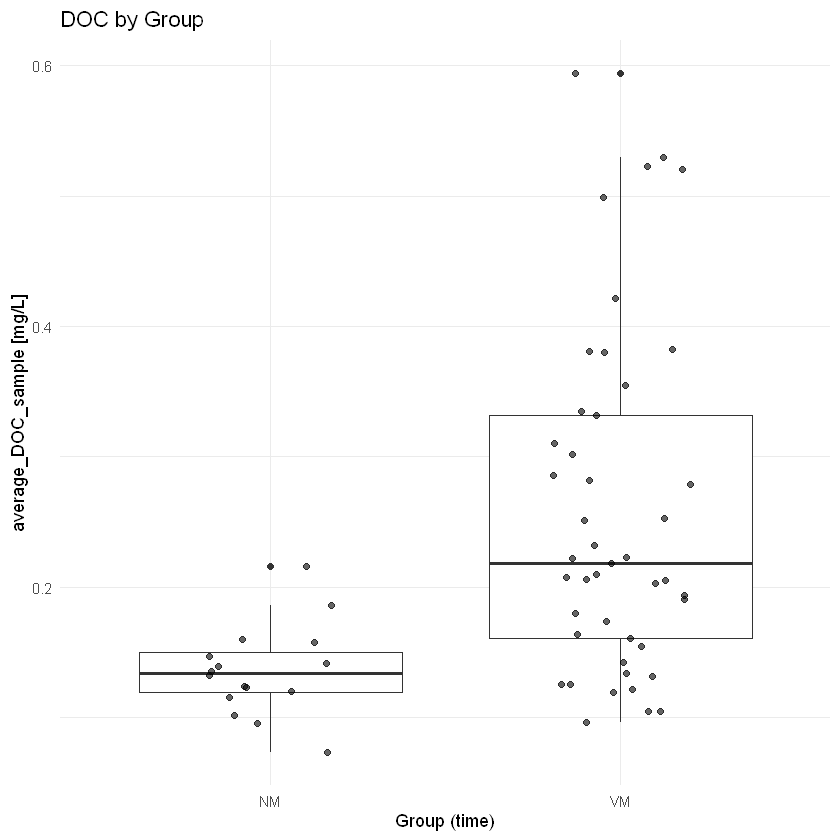

Warning message:
"Removed 28 rows containing non-finite outside the scale range (`stat_boxplot()`)."
Warning message:
"Removed 28 rows containing missing values or values outside the scale range (`geom_point()`)."


In [ ]:
# Libraries laden
library(readxl)
library(dplyr)
library(ggplot2)

# Datei einlesen
data_path <- "C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/MASTER_DATA_short_Grouping.xlsx"
df <- read_excel(data_path)

# Spaltennamen checken und Leerschläge entfernen
colnames(df) <- trimws(colnames(df))

# Gruppen überprüfen
table(df$time)

# --- Normalverteilung prüfen ---

## DOC
shapiro.test(df$average_DOC_sample[df$time == "VM"])
shapiro.test(df$average_DOC_sample[df$time == "NM"])

## BDOC_pct
shapiro.test(df$BDOC_pct[df$time == "VM"])
shapiro.test(df$BDOC_pct[df$time == "NM"])

## CO2_Flux
shapiro.test(df$CO2_Flux[df$time == "VM"])
shapiro.test(df$CO2_Flux[df$time == "NM"])

# --- Signifikanztests ---

## DOC
t.test(average_DOC_sample ~ time, data = df)
# oder (falls nicht normalverteilt)
wilcox.test(average_DOC_sample ~ time, data = df)

## BDOC_pct
t.test(BDOC_pct ~ time, data = df)
# oder
wilcox.test(BDOC_pct ~ time, data = df)

## CO2_Flux
t.test(CO2_Flux ~ time, data = df)
# oder
wilcox.test(CO2_Flux ~ time, data = df)

# --- Plots ---

## DOC
ggplot(df, aes(x = time, y = average_DOC_sample)) +
  geom_boxplot() +
  geom_jitter(width = 0.2, alpha = 0.6) +
  theme_minimal() +
  labs(title = "DOC by Group", x = "Group (time)", y = "average_DOC_sample [mg/L]")

## BDOC_pct
ggplot(df, aes(x = time, y = BDOC_pct)) +
  geom_boxplot() +
  geom_jitter(width = 0.2, alpha = 0.6) +
  theme_minimal() +
  labs(title = "BDOC_pct by Group", x = "Group (time)", y = "BDOC [%]")

## CO2_Flux
ggplot(df, aes(x = time, y = CO2_Flux)) +
  geom_boxplot() +
  geom_jitter(width = 0.2, alpha = 0.6) +
  theme_minimal() +
  labs(title = "CO2 Flux by Group", x = "Group (time)", y = "CO2 Flux [mg m⁻² h⁻¹]")


In [ ]:
# Dataframe erstellen
summary_table <- data.frame(
  Fluss = c("Vestari_Joekulsa", "Vestari_Joekulsa", "Vestari_Joekulsa",
            "Virkisa", "Virkisa", "Virkisa"),
  Variable = c("DOC", "BDOC_pct", "CO2_Flux",
               "DOC", "BDOC_pct", "CO2_Flux"),
  Test = c("t-Test", "t-Test", "t-Test",
           "Wilcoxon-Test", "t-Test", "t-Test"),
  p_Wert = c(0.39, 0.66, 1.00,
             0.00026, 0.00031, 0.42),
  Signifikant = c("Nein", "Nein", "Nein",
                  "Ja", "Ja", "Nein")
)

# p-Werte runden (optional)
summary_table$p_Wert <- round(summary_table$p_Wert, 5)

# Tabelle anzeigen
summary_table
